In [8]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def set_style():
    sns.set_context("paper")
    sns.set(font='serif', font_scale = 1.5)
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white'
    })

/anaconda3/envs/dempref/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


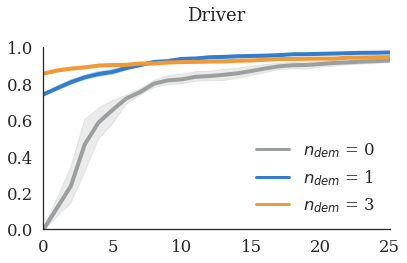

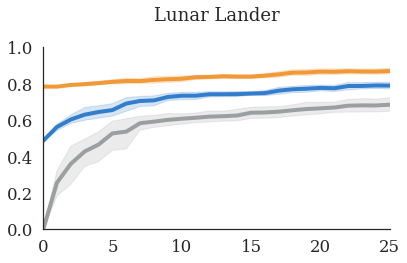

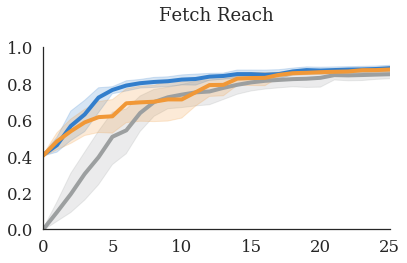

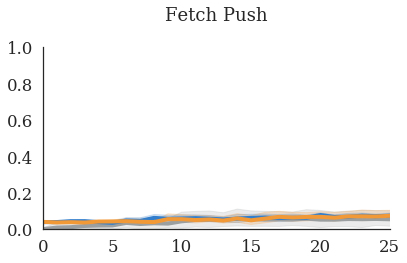

In [10]:
# optimal human
i = 0
colors = ["#F19837", "#327ECC", "#9C9FA0"]
palette = {'$n_{dem}$ = 0': colors[2], '$n_{dem}$ = 1': colors[1], '$n_{dem}$ = 3': colors[0]}
set_style()

for domain in ["driver", "lander", "fetch_move", "fetch_push"]:
    plt.figure(i)
    d_map = {'driver': "Driver", "lander": "Lunar Lander", "fetch_move": "Fetch Reach", "fetch_push": "Fetch Push"}
    plt.title(f"{d_map[domain]}\n")
    df = pd.DataFrame(np.zeros((0,5)), columns=["run #", "pref_iter", "type", "value", "dempref"])
    for DEMPREF in [0, 1, 3]:
        name = f"results/domain={domain},n_demos={DEMPREF}_db.pickle"
        db = pickle.load(open(name, 'rb'), encoding='bytes')
        label = "$n_{dem}$ = " + str(DEMPREF)
        db["dempref"] = label
        df = df.append(db, ignore_index=True)
    m = df[df.type=='m']
    m["value"] = pd.to_numeric(m["value"])
    ax = sns.lineplot(x='pref_iter', y='value', hue="dempref", data=m, lw=4, palette=palette)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    l = plt.legend()
    handles, labels = ax.get_legend_handles_labels()
    leg = ax.legend(handles=handles[1:], labels=labels[1:], frameon=False)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)
    plt.xlabel("")
    plt.ylabel("")
    plt.xlim([0,25])
    plt.ylim([0,1])
    plt.xticks([0, 5, 10, 15, 20, 25], [0, 5, 10, 15, 20, 25])
    if domain != "driver":
        ax.get_legend().remove()
    plt.tight_layout()

    i += 1